# **The Stater Code**

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from collections import Counter


**Report**

In this part I'm importing the required libraries in order to use them for doing different procedures.

# Load the data and showing some high level information of dataset

In [3]:
# importing dataset
df=pd.read_csv("/amazon.csv")

# display 1st 8 rows
display(df.head(8))

# display last 5 rows
display(df.tail(5))

# dimension of the dataset
print("Dimension of the dataset:",df.ndim);print();print("Number of Rows and Columns:",df.shape);print()

# dataset info
print("Dataset Info:")
print("\n")
display(df.info() )


# description of numerical columns, like mean,min,max,count,and quartiles 
print("\n")
display("Description of numerical columns:",df.describe())

# checking for number of unique states and changing name of a state from Par� to Pará
df = df.replace('Par�', 'Pará')
print("Unique states are : ")
display(df['state'].unique())


# checking for the unique years of this dataset
print();print("Unique Years are : ")
display(df['year'].unique())


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01


,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


Dimension of the dataset: 2

Number of Rows and Columns: (6454, 5)

Dataset Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


None

'Description of numerical columns:'

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


Unique states are : 


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)


Unique Years are : 


array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

**Report**

- As we see above , the first 8 rows and last 5 rows of the dataset have been presented. This dataset presents the number of fires for the 23 different states of Brazil from 1998  to 2017 in various months.
- As indicated above,this dataset has **6454** rows and **5** columns that types of data and columns' names can be seen in the dataset info.
- Also, numerical columns are the year and number that as indicated for the year column, minimum is 1998,maximum is 2017 and the avergae is almost 2007.50 .
- For the number column that is for the number of fire, minimum is 0,maximum is 998 and the average is almost 108.30 .
- Unique states and years have been shown . 

# Pre-Process the data

**Change months into English: 'Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'** 
       
       
**Replace the original date with new Month_Year**

In [4]:
# changing portugeese names of months to English ones
df.loc[ df["month"] == "Janeiro", "month"] = "Jan"
df.loc[ df["month"] == "Fevereiro", "month"] = "Feb"
df.loc[ df["month"] == "Mar�o", "month"] = "March"
df.loc[ df["month"] == "Abril", "month"] = "Apr"
df.loc[ df["month"] == "Maio", "month"] = "May"
df.loc[ df["month"] == "Junho", "month"] = "June"
df.loc[ df["month"] == "Julho", "month"] = "July"
df.loc[ df["month"] == "Agosto", "month"] = "Aug"
df.loc[ df["month"] == "Setembro", "month"] = "Sep"
df.loc[ df["month"] == "Outubro", "month"] = "Oct"
df.loc[ df["month"] == "Novembro", "month"] = "Nov"
df.loc[ df["month"] == "Dezembro", "month"] = "Dec"

# display the new values for month
display(df.month.value_counts())

# display the df
display(df.head(8))

Jan      541
Feb      540
Aug      540
March    540
July     540
June     540
Apr      540
Sep      540
Oct      540
Nov      540
May      540
Dec      513
Name: month, dtype: int64

,year,state,month,number,date
0,1998,Acre,Jan,0.0,1998-01-01
1,1999,Acre,Jan,0.0,1999-01-01
2,2000,Acre,Jan,0.0,2000-01-01
3,2001,Acre,Jan,0.0,2001-01-01
4,2002,Acre,Jan,0.0,2002-01-01
5,2003,Acre,Jan,10.0,2003-01-01
6,2004,Acre,Jan,0.0,2004-01-01
7,2005,Acre,Jan,12.0,2005-01-01


**Report**

For this part , I used the explicit indexing "loc" in order to change the names of months to English ones.

**Replace the original date with new Month_Year**

**Reomve the original date column**

In [6]:
# extract years
years=df.year

# mapping for the month names and numbers
mappings = {'Jan': '01', 'Feb': '02', 'March': '03', 'Apr': '04', 'May': '05', 'June': '06',
            'July': '07',  'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

# create Correct date column
df['Correct Date'] =   years.astype(str)+ '-' + df['month'].map(mappings)
df['Correct Date'] = pd.to_datetime(df['Correct Date'])#changing type of column to date time

#drop the incorrect date column
df = df.drop(columns=['date'])

# display dataset after these changes
display(df)




,year,state,month,number,Correct Date
0,1998,Acre,Jan,0.0,1998-01-01
1,1999,Acre,Jan,0.0,1999-01-01
2,2000,Acre,Jan,0.0,2000-01-01
3,2001,Acre,Jan,0.0,2001-01-01
4,2002,Acre,Jan,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dec,128.0,2012-12-01
6450,2013,Tocantins,Dec,85.0,2013-12-01
6451,2014,Tocantins,Dec,223.0,2014-12-01
6452,2015,Tocantins,Dec,373.0,2015-12-01


**Report**

For this section, I used mapping in order to map the month names to the month numbers and then I used the pd.to_datetime due to change the type of this column to datetime64 for having the new date column named **Correct Date**. After that , I removed the primary date column which was incorrect. 

**Checking Null Values - use two different methods**

In [10]:
# checking the null values method 1
print("Method one for null values : ");print()
display(df.isnull().sum())

# checking the null values method 2
print("Method two for null values : ");print()
display(df.isna().sum())

# checking the null values method 3
print("Method three for null values, False means there is no null values : ");print()
display(df.isnull().any())

Method one for null values : 



year            0
state           0
month           0
number          0
Correct Date    0
dtype: int64

Method two for null values : 



year            0
state           0
month           0
number          0
Correct Date    0
dtype: int64

Method three for null values, False means there is no null values : 



year            False
state           False
month           False
number          False
Correct Date    False
dtype: bool

**Report**

Here I used 3 methods for checking if we have any NA values. None of methods detected NA values.So, we can say  there is no NA in this dataset.

# **Exploratory Data Analysis**

**Plot the histograms of month and year**

Jan      541
Feb      540
Aug      540
March    540
July     540
June     540
Apr      540
Sep      540
Oct      540
Nov      540
May      540
Dec      513
Name: month, dtype: int64

Counter({1998: 324,
         1999: 324,
         2000: 324,
         2001: 324,
         2002: 324,
         2003: 324,
         2004: 324,
         2005: 324,
         2006: 324,
         2007: 324,
         2008: 324,
         2009: 324,
         2010: 324,
         2011: 324,
         2012: 324,
         2013: 324,
         2014: 324,
         2015: 324,
         2016: 324,
         2017: 298})

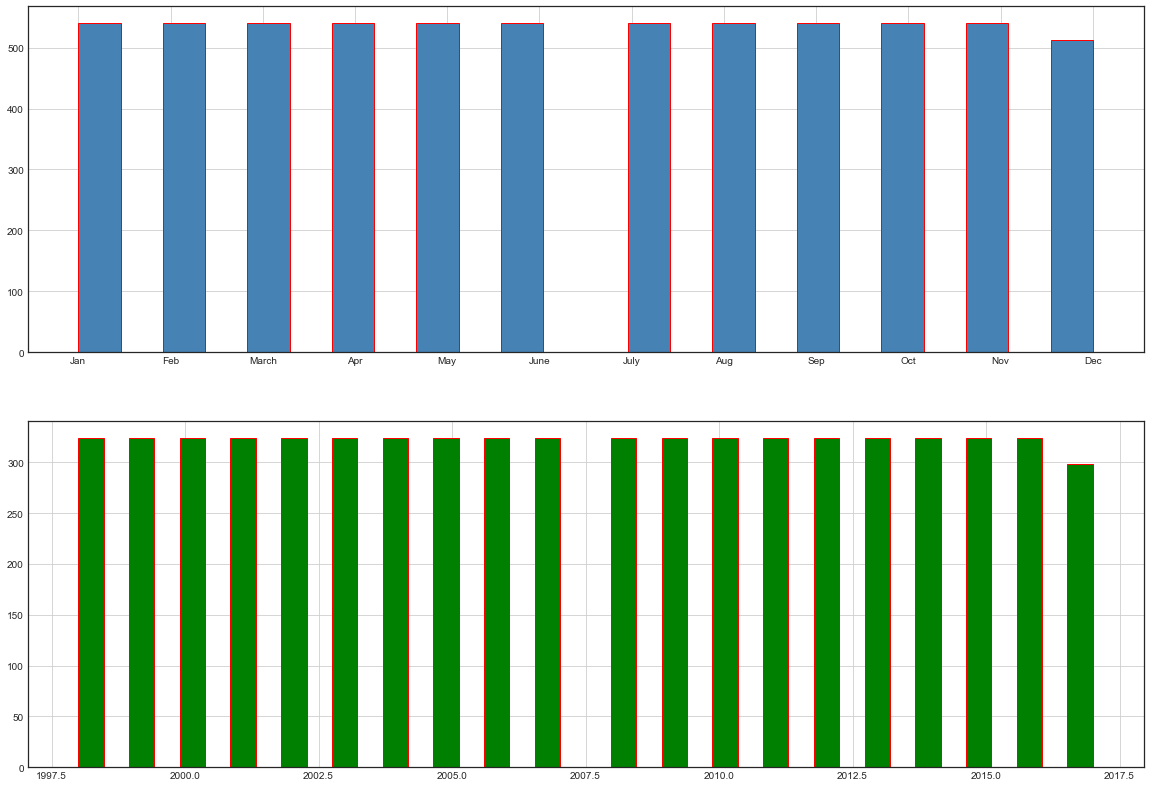

In [11]:
# display the month
plt.style.use('seaborn-white')

# the number of each month repeated in the dataset
display(df.month.value_counts())

# the number of each year repeated in the dataset
c = Counter(df.year)
display(c)


# create fig
plt.figure()

# plot the month histogram
plt.subplot(2,1,1)
df.month.hist(bins=24,figsize=(20, 14),histtype='stepfilled', color='steelblue',
         edgecolor='red')

# plot the year histogram
plt.subplot(2,1,2)
df.year.hist(bins=40,histtype='stepfilled', color='green',
         edgecolor='red')

plt.show();

**Report**

In order to check the histogram plot, at the first I tried to get the number of each month and year that have been repeated in this dataset:

- For month , for instance the number of  month **Jan** has been repeated 541 times as indicated. "Dec" for 513 times and the other months have been repeated 540 times each.As a matter of fact,this is the frequency of months.

- For the years also, as we can see in the above all years except 2017 have the frequency of 324 and 2017 frequency is 298.

- For the histogram, I used 2 times the number of unique months and years in order to have a better and more clear hitogram plot. Otherwise , we had something like rectangular shape for this dataset since the frequency of month and years are almost the same and it is not like a normal distributuon that can have a well shaped histogram plot.

**Calculate the total number of fires in each state and plot the histograms over all states**

**Check the requirements in the instruction!**

The total Number of fires per state is :


,state,number
0,Mato Grosso,96246.028
1,Paraiba,52435.918
2,Sao Paulo,51121.198
3,Rio,45160.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


'The min number of fire is for : '

,state,number
22,Sergipe,3237.0


'The max number of fire is for : '

,state,number
0,Mato Grosso,96246.028


'The average number of fire over all states is : '

30388.003173913043

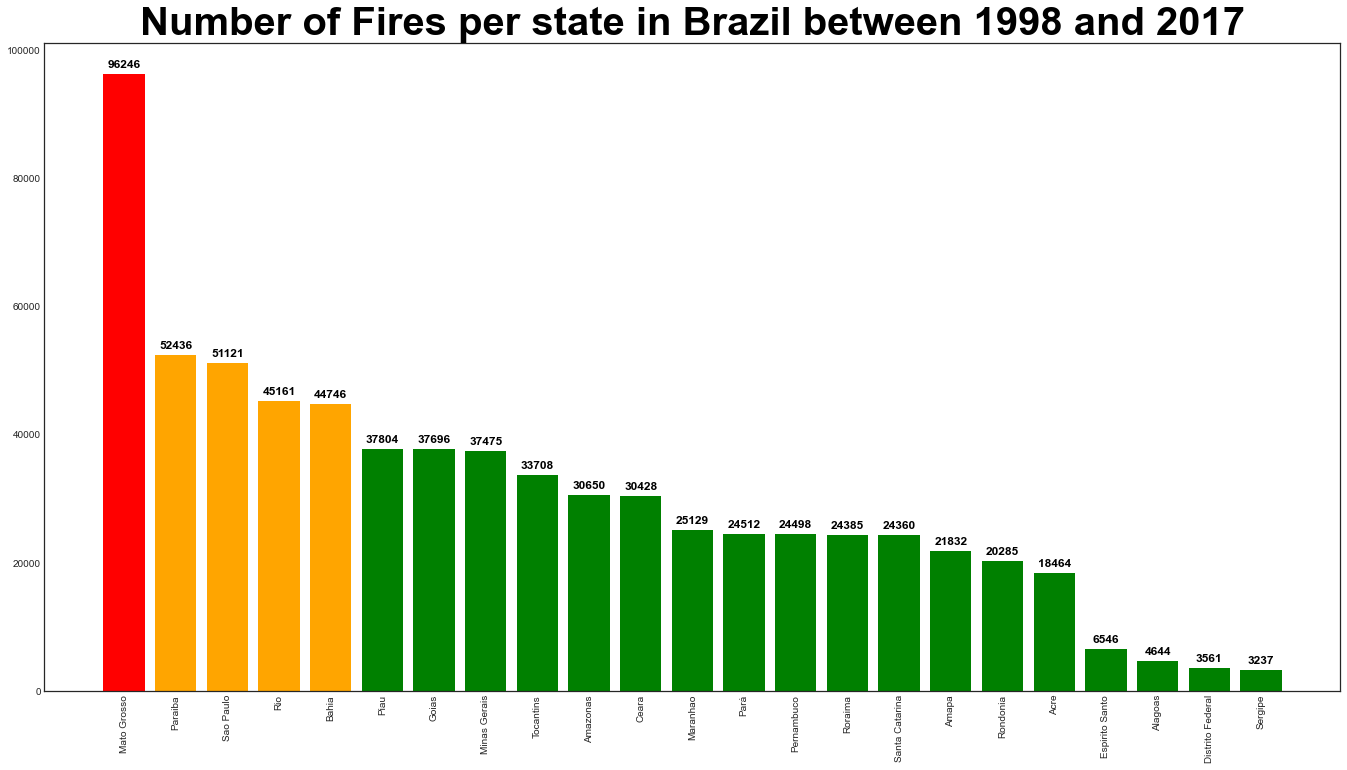

In [12]:

# create a dataframe for calculating the number of fires per state
df1 = df.groupby('state', as_index = False).agg({'number' : 'sum'}) \
.sort_values('number', ascending = False).reset_index().drop('index', axis = 1)

# calculate the number of fires in each state
print("The total Number of fires per state is :")
display(df1)


# create fig to show the plot
fig = plt.figure(figsize = (18, 9))
ax = fig.add_axes([0, 0, 1, 1])

# create chart
ax.bar(x = df1['state'][:1], height = df1['number'][:1], color = 'red')
ax.bar(x = df1['state'][1:5], height = df1['number'][1:5], color = 'orange')
ax.bar(x = df1['state'][5:], height = df1['number'][5:],color='green')


# for the notation on the bars
for s in ax.patches:
    width = s.get_width()
    height = s.get_height()
    x, y = s.get_xy() 
    ax.annotate('{:.0f}'.format(height), (x + width/2, y + height+1000), fontsize = 12, fontweight = 'bold',color = 'black' ,ha='center' )

    
# title of plot
plt.title('Number of Fires per state in Brazil between 1998 and 2017', horizontalalignment='center', color = 'black', fontsize = 40, fontweight = 'bold')
plt.xticks(rotation = 90);



# most and least number of fires as well as mean over all states
print()
display("The min number of fire is for : ",df1[df1.number == df1.number.min()])#min
print()
display("The max number of fire is for : ",df1[df1.number == df1.number.max()])#max
print()
display("The average number of fire over all states is : ",df1.number.mean())#mean
print()

**Report**

For getting the number of fires for each state , I used the group by function over the state column. Then , I used the aggregation function (sum) over the number column in order to add the number of fires for each state. 

Then , I sorted these values based on number of fires for each state from the highest to the lowest.After that I reseted the index and drop the previous index in the 1st axis in order to save it as a dataframe without any extra indexes. Finally , I saved it in a new data frame named df1.

Histogram bar plot clearly shows the 3 levels for the fires for each state. The 1st level is presented by Red color that shows the highest number of fire which is for Mato Grosso state. 2nd Level is indicated by orange color including 4 states. And the 3rd level which is presented by Green color includes 18 states.

Also, for the Max and Min number of fires among all states, I used the method showing the df1 dataframe when the number column in df1 dataframe is maximum and minimum respectively.

As indictaed in the plot, the **maximum** number of fires has been for the **Mato Grosso** state with **96246.028** fires. And the **minimum** number of fires has been for the **Sergipe** state with **3237** fires.

It is worth mentioning that the average value of fire over all states is **30388**.


**Calculate the total number of fires in 'Amazonas' each year and plot it**

**Check the requirements in the instruction!**

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


total number of fires in amazonas:  30650.129


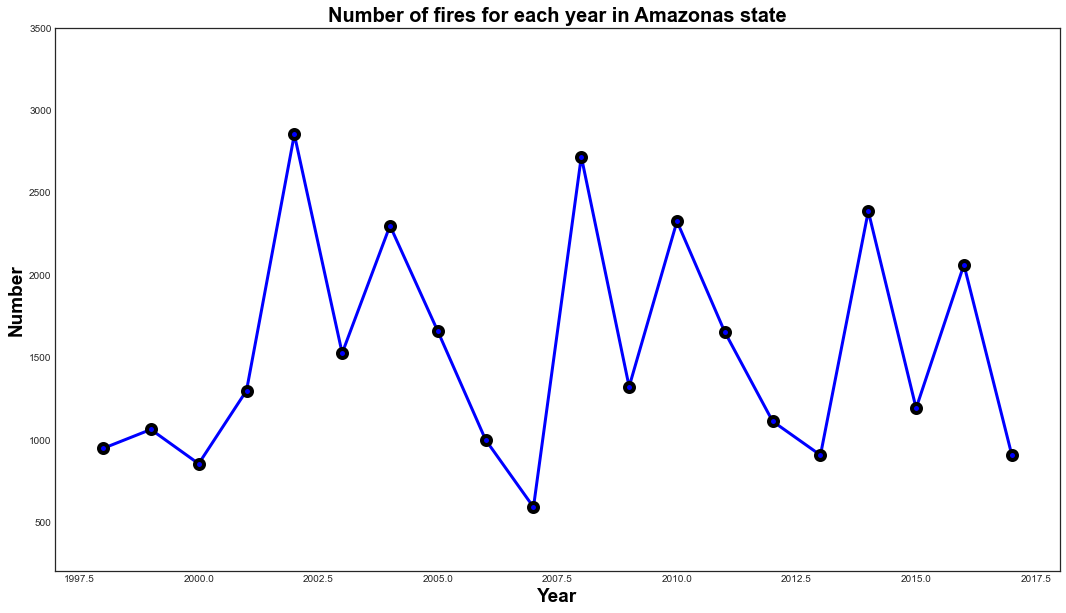

In [13]:
# to get the fire values for Amazonas state in each year
amazonas_df= (df.loc[df.state=="Amazonas",:].groupby("year").agg({"number":"sum"}).sort_values("year").
           reset_index()
)

# show the values
display(amazonas_df)

# to check if I got it correctly 
print("total number of fires in amazonas: ",amazonas_df.number.sum())


# plot
plt.figure(figsize = (18, 10))
plt.plot(amazonas_df.year,amazonas_df.number, '-ok',color='blue',
                markersize=9, linewidth=3,
                markeredgecolor='black',
                markeredgewidth=4)
# limits
plt.xlim(1997,2018)
plt.ylim(200, 3500)


# labels
plt.xlabel('Year', color = 'black', fontsize = 19, fontweight = 'bold')
plt.ylabel('Number', color = 'black', fontsize = 19, fontweight = 'bold')

# title
plt.title('Number of fires for each year in Amazonas state', color = 'black', fontsize = 20, fontweight = 'bold');



**Indicate the years with the most and the least number of fires in the Amazonas**

In [14]:
# most and least number of fires in Amazonas state
display("The minimum number of fire in Amazonas state is for : "
        ,amazonas_df[amazonas_df.number == amazonas_df.number.min()])#min
print()
display("The maximum number of fire in Amazonas state is for : "
        ,amazonas_df[amazonas_df.number == amazonas_df.number.max()])#max

'The minimum number of fire in Amazonas state is for : '

,year,number
9,2007,589.601


'The maximum number of fire in Amazonas state is for : '

,year,number
4,2002,2852.0


**Report**

For getting the number of fires in Amazonas state, I used the group by function when the state column in original data frame is Amazonas by means of explicit indexing and the aggregation function is sum on the number column.

Then I sorted it based on the years and in the final step I reseted the index. I saved these data in a new 2-column data frame named amazonas_df that includes the years and number of fires in Amazonas state. 

To check if I got these numbers correctly , I used the sum over the number column and compared it with the previous section output that gave us the number of fires in each state.

For the plot , I used the plt.plot in order to show the number of fires in different years in Amazonas state.In order to have a better plot,I used the available options in the plt.plot to show a better one. 

As we see, there are sharp increasing trends from 2000 to 2002 and also since 2007 to 2008 . It is noticeable. Generally , there are several increase and decreases in the plot ;however, if we look from 2008 to 2017 a decreasing trend can be seen because the pinnacles have been decreasing. 

Also, for the Max and Min number of fires in Amazonas, I used the method showing the amazonas dataframe when the number column in Amazonas dataframe is maximum and minimum respectively.

As indictaed in the plot for the Amazonas state, the **maximum** number of fires has been for the year **2002 with 2852** fires. And the **minimum** number of fires has been for the year **2007 with 589.601** fires.

**Note**
**Acknowledgement**

Credits for brazilian system of forest information and all contributors to the data.